In [238]:
Metrics.nll(5, 5.0, 0.000001)

-12.896572

0.7758758758758759


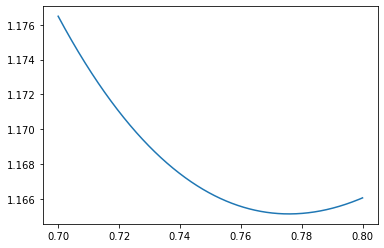

In [228]:
i = np.linspace(0.7, 0.8, 1000)
nll = [Metrics.nll(5, 5.7758466, _) for _ in i]

plt.plot(i, nll)

print(i[np.argmin(nll)])

In [168]:
import numpy as np
import matplotlib.pyplot as plt

def do_plot(predictions):
    plt.subplot(2,1,1)
    plt.title('prediction')
    plt.plot(x, predictions.mean(0), color='black')
    for conf in range(10):
        plt.fill_between(x, 
                         predictions.mean(0)-conf*np.std(predictions, 0), 
                         predictions.mean(0)+conf*np.std(predictions, 0), 
                         color='black', 
                         linewidth = 0,
                         alpha = 0.1)
    plt.subplot(2,1,2)
    plt.title('standard deviation')
    plt.plot(predictions.std(0), color='black')
    plt.show()

def get_m(mean = 1, std=0.2, shape_w=1):
    return np.random.normal(mean, std, shape_w)

def get_c(mean = 0, std=0.1):
    return np.random.normal(mean, std)


def combined(x, y_0 = 0, model = 'mean', data='mean', m_mu=1, m_sigma = 0.05, c_mu=0, c_sigma=0.025):
    y = np.zeros(x.shape)
    y[0] = y_0
    
    if model == 'mean':
        m = m_mu
    if data == 'mean':
        c = c_mu
    if model == 'once':
        m = get_m(m_mu, m_sigma)
    if data == 'once':
        c = get_c(c_mu, c_sigma)
        
    for i in range(1,x.shape[0]):
        if model == 'always':
            m = get_m(m_mu, m_sigma)

        if data == 'always':
            c = get_c(c_mu, c_sigma)
            
        dx = x[i]-x[i-1]
        y[i] = m * dx + y[i-1] + c
    return y


In [207]:
a = np.random.normal(1, 0.1, (10000, 1))
a = a.repeat(5).reshape(10000, 5)
b = np.cumsum(a, -1)

In [218]:
b[4]

array([1.15516932, 2.31033864, 3.46550796, 4.62067728, 5.7758466 ])

In [191]:
np.sqrt(np.asarray([1, 2, 3, 4, 5])*0.1**2)


\sqrt{x \sigma_m2}

array([0.1       , 0.14142136, 0.17320508, 0.2       , 0.2236068 ])

model uncertainty:mean,	 data uncertainty:mean


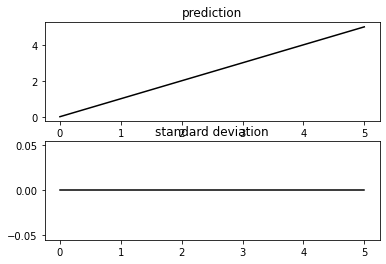

model uncertainty:mean,	 data uncertainty:once


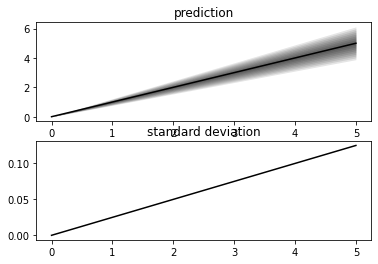

model uncertainty:mean,	 data uncertainty:always


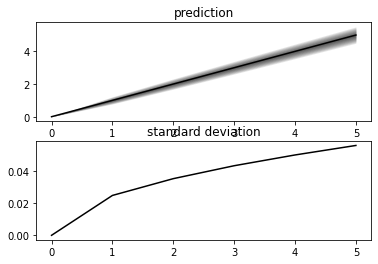

model uncertainty:once,	 data uncertainty:mean


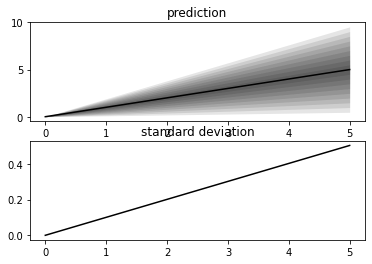

model uncertainty:once,	 data uncertainty:once


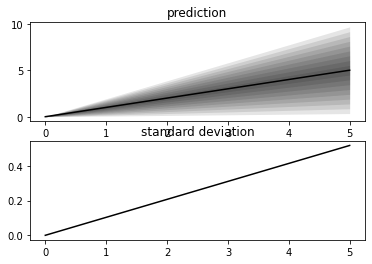

model uncertainty:once,	 data uncertainty:always


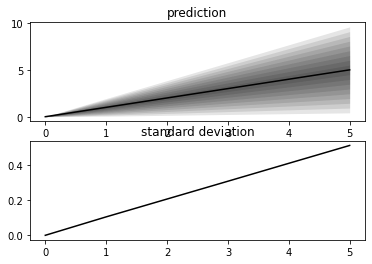

model uncertainty:always,	 data uncertainty:mean


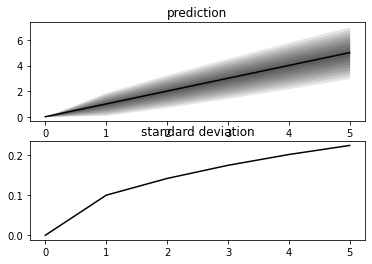

model uncertainty:always,	 data uncertainty:once


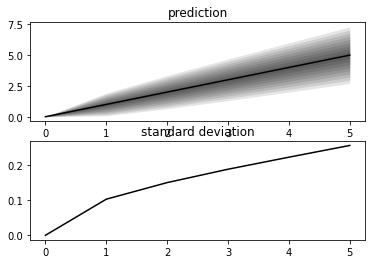

model uncertainty:always,	 data uncertainty:always


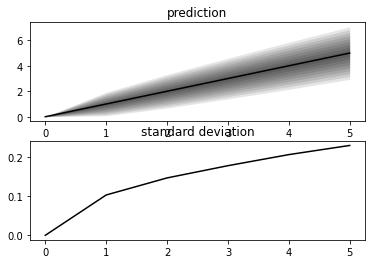

In [169]:
x = np.linspace(0, 5, 6)
y_0 = 0

res = {}
for m in ['mean', 'once','always']:
    res[m] = {}
    for c in ['mean', 'once','always']:
        print('model uncertainty:' + m + ',\t data uncertainty:' + c)
        predictions = np.asarray([combined(x, model=m, data=c, m_mu=1, m_sigma = 0.1, c_mu=0, c_sigma=0.025) for _ in range(10000)])
        do_plot(predictions)
        
        res[m][c] = predictions

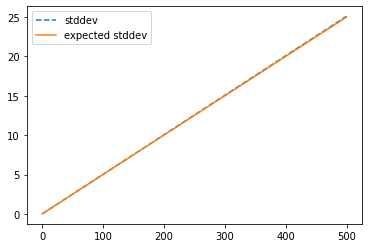

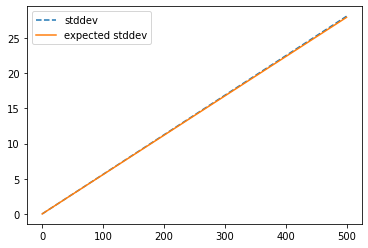

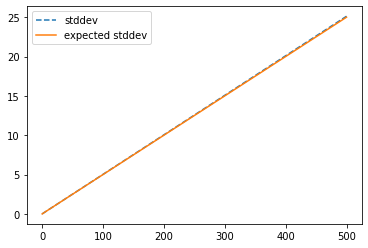

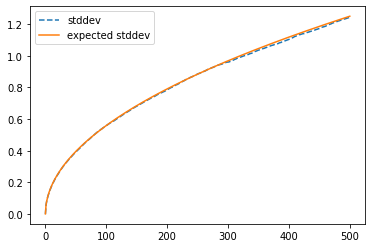

In [167]:
m_sigma = 0.05
c_sigma = 0.025


plt.plot(x, np.std(res['once']['mean'], 0), '--', label = 'stddev')
plt.plot(x, x*m_sigma, label = 'expected stddev')
plt.legend()
plt.show()

plt.plot(x, np.std(res['once']['once'], 0), '--', label = 'stddev')
plt.plot(x, np.sqrt((x*m_sigma)**2 + (x*c_sigma)**2), label = 'expected stddev')
plt.legend()
plt.show()

plt.plot(x, np.std(res['once']['always'], 0), '--', label = 'stddev')
plt.plot(x, np.sqrt((x*m_sigma)**2 + np.sqrt(x*c_sigma**2)**2), label = 'expected stddev')
plt.legend()
plt.show()

plt.plot(x, np.std(res['always']['always'], 0), '--', label = 'stddev')
plt.plot(x, np.sqrt(np.sqrt(x*m_sigma**2)**2 + np.sqrt(x*c_sigma**2)**2), label = 'expected stddev')
plt.legend()
plt.show()

sampling once at start of making predictions: \
multiplying a normal distribution by a constant K: \
$$
Y = \mathcal{N}(k \mu, k^2 \sigma^2) \\
  = \mathcal{N}(k \mu, k \sigma) \\
$$
Uncertainty increases linearly.

sampling every prediction: \
Adding 2 normal distributions: \
$$
a = \mathcal{N}(\mu_1, \sigma_1) \\
b = \mathcal{N}(\mu_2, \sigma_2) \\
a+b = \mathcal{N}\left(\mu_1 + \mu_2, \sqrt{\sigma_1^2 + \sigma_2^2}\right)\\
$$

if $$\sigma_1 = \sigma_2 = \sigma_3 ...$$ \
then 

$$
\sum_{i=1}^n (\sigma_i) = \mathcal{N}\left(n \mu, \sqrt{n \sigma^2}\right) 
$$
Uncertainty increases according to $$\sqrt{\gamma}$$